# Data Wrangling

## Gathering Data

### Loading files and scrapping twitter

In [1]:
import tweepy

consumer_key = 'PfmT17TAgFtWMDnIpIOhRmhHK'
consumer_secret = 'LLVcySeakw4HgQmqSM9TFiMMTo1dswdPZKFWu329GLKQNUhGlj'
access_token = '1161415123413721090-OwdSE8FZ4Msr1S9EFYsGS02gyxxKK9'
access_secret = 'f8PtrFuB9YuJtfRwIJ5PgQ4LlvMlSg7qRjY2nTEdVflW8'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [78]:
import pandas as pd
import numpy as np
import requests
import json

In [79]:
df_main= pd.read_csv('twitter-archive-enhanced.csv')

In [4]:
url= 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response= requests.get(url)
with open('image_predictions.tsv', mode='wb') as file:
        file.write(response.content)
        
df_img= pd.read_csv('image_predictions.tsv', sep="\t")

Checking the Scrapping process will work

In [5]:
#https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

tweet = api.get_status(839549326359670784)
print(tweet.text)

Meet Winston. He knows he's a little too big for the swing, but he doesn't care. Kindly requests a push. 12/10 woul… https://t.co/ESW7mcQeZV


Scrapping twitter iteratively and combining data in text file

In [38]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

df_list = []
df_error = []
with open('tweet_json.txt', mode='w') as file:
    for tweet_id in df_main['tweet_id']:
        try: 
            tweet= api.get_status(tweet_id, tweet_mode='extended')
            df_list.append(tweet)
            #https://www.guru99.com/python-json.html 
            #https://stackabuse.com/reading-and-writing-json-to-a-file-in-python/
            file.write(json.dumps(tweet._json) + '\n')
        except Exception as e:
            df_error.append(tweet)

Rate limit reached. Sleeping for: 718
Rate limit reached. Sleeping for: 718


Making a data frame with data extracted from text file

In [6]:
id_=[]
rt=[]
fav=[]
with open('tweet_json.txt', mode='r') as file:
        for line in file.readlines():
            data= json.loads(line)
            id_.append(data['id'])
            rt.append(data['retweet_count'])
            fav.append(data['favorite_count'])
            
df_query= pd.DataFrame({'tweet_id':id_, 'retweet_count':rt, 'favourite_count':fav})

## Assesing Data

Visually inspecting df_main

In [7]:
df_main.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
685,788150585577050112,NaN,NaN,2016-10-17 22:51:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Leo. He's a golden chow. Rather h*ckin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/788150585...,13,10,Leo,None,None,None,None
1113,733109485275860992,NaN,NaN,2016-05-19 01:38:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like father (doggo), like son (pupper). Both 1...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo,None,pupper,None
1728,679872969355714560,NaN,NaN,2015-12-24 03:55:21 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Rocco. He's in a very intense game of ...,NaN,NaN,NaN,https://vine.co/v/iAAxTbj1UAM,10,10,Rocco,None,None,None,None


Programatically inspecting df_main

In [8]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

Checking name column for input error

In [9]:
df_main['name'].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
Oliver         11
Lola           10
Penny          10
Tucker         10
Bo              9
Winston         9
the             8
Sadie           8
Toby            7
Buddy           7
Bailey          7
an              7
Daisy           7
Oscar           6
Jax             6
Dave            6
Leo             6
Stanley         6
Koda            6
Rusty           6
Jack            6
Bella           6
Milo            6
Scout           6
George          5
             ... 
Napolean        1
Sage            1
Crouton         1
Taco            1
Huxley          1
Ginger          1
Butters         1
Brat            1
Wesley          1
Corey           1
Rumble          1
Lenox           1
Amélie          1
Sobe            1
Crawford        1
Dylan           1
Kendall         1
Pippin          1
incredibly      1
Peanut          1
Gustav          1
Sprinkles       1
Thor            1
Pawnd           1
Alexander 

Checking numerator column for input error

In [10]:
df_main['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [11]:
df_main.query('rating_numerator=="0"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0,10,None,None,None,None,None


Checking to see if the rating 0/10 was an error, I laughed because they weren't

In [12]:
tweet = api.get_status(835152434251116546)
print(tweet.text)

When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag


df_img correctly identifies that it is a picture of a swing

In [13]:
df_img.query('tweet_id=="835152434251116546"')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1824,835152434251116546,https://pbs.twimg.com/media/C5cOtWVWMAEjO5p.jpg,3,swing,0.967066,False,American_Staffordshire_terrier,0.012731,True,Staffordshire_bullterrier,0.007039,True


Checking for duplicates

In [14]:
df_main.tweet_id.duplicated().sum()

0

In [15]:
df_main.retweeted_status_id

0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
5                NaN
6                NaN
7                NaN
8                NaN
9                NaN
10               NaN
11               NaN
12               NaN
13               NaN
14               NaN
15               NaN
16               NaN
17               NaN
18               NaN
19      8.874740e+17
20               NaN
21               NaN
22               NaN
23               NaN
24               NaN
25               NaN
26               NaN
27               NaN
28               NaN
29               NaN
            ...     
2326             NaN
2327             NaN
2328             NaN
2329             NaN
2330             NaN
2331             NaN
2332             NaN
2333             NaN
2334             NaN
2335             NaN
2336             NaN
2337             NaN
2338             NaN
2339             NaN
2340             NaN
2341             NaN
2342         

Visually inspecting df_img

In [16]:
df_img.sample(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1690,815736392542261248,https://pbs.twimg.com/media/C1IT6rVXUAIvwYT.jpg,3,Border_collie,0.548907,True,Cardigan,0.178523,True,collie,0.146351,True
594,679503373272485890,https://pbs.twimg.com/media/CW4UtmYWsAAEjqA.jpg,1,porcupine,0.999846,False,meerkat,0.000072,False,echidna,0.000044,False
1024,710588934686908417,https://pbs.twimg.com/media/CdyE2x1W8AAe0TG.jpg,4,Pembroke,0.982004,True,Cardigan,0.008943,True,malamute,0.007550,True


Programmatically inspecting df_img

In [17]:
df_img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


Checking number of photos not of dogs

In [18]:
df_img.query('p1_dog==False').count()[0]

543

Checking for duplicated tweet_id

In [19]:
df_img.tweet_id.duplicated().sum()

0

Checking for duplicated jpg_url

In [20]:
df_img.jpg_url.duplicated().sum()

66

Visually inspecting df_query

In [21]:
df_query.sample(3)

,tweet_id,retweet_count,favourite_count
1068,737678689543020544,1366,5156
160,859851578198683649,3444,15215
2224,667873844930215936,396,619


Programmatically inspecting df_img

In [22]:
df_query.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 3 columns):
tweet_id           2333 non-null int64
retweet_count      2333 non-null int64
favourite_count    2333 non-null int64
dtypes: int64(3)
memory usage: 54.8 KB


## Cleaning Data

### Quality Issues

df_main:
- tweet_id should be a string not and integer
- timestamp is an opbject
- in_reply_to_status_id  is a float
- in_reply_to_user_id is a float
- retweeted_status_timestamp is an object
- retweeted_status_id is a float
- incorrect names (a, the, an, etc.)

df_img: 
- tweet_id should be a string not and integer
- 543 photos arent of dogs
- there are multiple same photos

df_query:
- tweet_id should be a string not and integer
- missing some tweet_id's after scrapping
    

### Tidiness Issues

- the dataframes (df_main, df_img, df_query) shopuld all be combined
- the columns for doggo, fluffer, puppo, and pupper can be combined

### df_main

#### Define

1)Need to fix data types in multiple columns, I will use the .astype( ) command

#### Code

In [23]:
df_main_c= df_main.copy()

In [24]:
df_main_c= df_main.copy()
df_main_c.tweet_id= df_main_c.tweet_id.astype('object')
df_main_c.timestamp= pd.to_datetime(df_main_c.timestamp)
df_main_c.retweeted_status_timestamp= pd.to_datetime(df_main_c.retweeted_status_timestamp)

#### Test

In [25]:
df_main_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetim

#### Define

2)Need to remove all retweets so we only have original tweets, we will keep all null values for in_reply_to_user_id and retweeted_status_id.

#### Code

In [26]:
df_main_c= df_main_c[df_main_c.in_reply_to_user_id.isnull()]
df_main_c= df_main_c[df_main_c.retweeted_status_id.isnull()]

#### Test

In [27]:
df_main_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null datetime64[ns]
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: datetime64[ns](

#### Define

3)We will drop the columns in_reply_to_user_id and retweeted_status_id because we will only have null values now.

#### Code

In [28]:
df_main_c= df_main_c.drop(labels=['in_reply_to_status_id',
                                'in_reply_to_user_id',
                               'retweeted_status_id',
                                'retweeted_status_user_id',
                               'retweeted_status_timestamp',
                               ],axis=1)

#### Test

In [29]:
df_main_c.head(0)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### Define

4)We will search for names in lower case and convert them to 'None'

#### Code

In [30]:
#https://stackoverflow.com/questions/50633935/pandas-replace-all-strings-in-lowercase-in-a-column-with-none
df_main_c.loc[df_main_c['name'] == df_main_c['name'].str.lower(), 'name'] = 'None'


#### Test

In [31]:
df_main_c.name

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
5           None
6            Jax
7           None
8           Zoey
9         Cassie
10          Koda
11         Bruno
12          None
13           Ted
14        Stuart
15        Oliver
16           Jim
17          Zeke
18       Ralphus
20        Gerald
21       Jeffrey
22          None
23        Canela
24          None
25          None
26          Maya
27        Mingus
28         Derek
29        Roscoe
31       Waffles
          ...   
2326        None
2327        None
2328        None
2329        None
2330        None
2331        None
2332        None
2333        None
2334        None
2335        None
2336        None
2337        None
2338        None
2339        None
2340        None
2341        None
2342        None
2343        None
2344        None
2345        None
2346        None
2347        None
2348        None
2349        None
2350        None
2351        None
2352        None
2353        No

In [32]:
df_main_c.name.value_counts()

None          707
Charlie        11
Lucy           11
Oliver         10
Cooper         10
Penny           9
Tucker          9
Winston         8
Sadie           8
Lola            8
Daisy           7
Toby            7
Jax             6
Stanley         6
Bo              6
Bella           6
Koda            6
Bailey          6
Oscar           6
Rusty           5
Leo             5
Bentley         5
Dave            5
Chester         5
Louis           5
Scout           5
Milo            5
Buddy           5
Jeffrey         4
Dexter          4
             ... 
Davey           1
Petrick         1
Pilot           1
Geno            1
Chuq            1
Peanut          1
Kane            1
Boston          1
Rupert          1
Cheesy          1
Pinot           1
Brandonald      1
Keet            1
Corey           1
Rumble          1
Lenox           1
Sobe            1
Terrance        1
Crawford        1
Blipson         1
Dylan           1
Kendall         1
Pippin          1
Stubert         1
Wesley    

### df_img

#### Define

5)Need to fix data types in tweet_id column, I will use the .astype( ) command

#### Code

In [33]:
df_img_c= df_img.copy()
df_img_c.tweet_id= df_img_c.tweet_id.astype('object')

#### Test

In [34]:
df_img_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


#### Define

6)We want to delete posts with images that aren't dogs

#### Code

In [35]:
df_img_c= df_img_c[df_img_c.p1_dog]

#### Test

In [36]:
df_img_c[~df_img_c.p1_dog]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


#### Define

7)We will remove posts which posted the same image by removing duplicated jpg_url's

#### Code

In [37]:
df_img_c.jpg_url.duplicated().sum()

52

In [38]:
#https://www.geeksforgeeks.org/python-pandas-dataframe-drop_duplicates/
df_img_c.sort_values("jpg_url", inplace = True)
df_img_c.drop_duplicates(subset ="jpg_url", 
                     keep = False, inplace = True)

#### Test

In [39]:
df_img_c.jpg_url.duplicated().sum()

0

### df_query 

#### Define

8)Need to fix data types in tweet_id column, I will use the .astype( ) command

#### Code

In [40]:
df_query_c= df_query.copy()
df_query_c.tweet_id= df_query_c.tweet_id.astype('object')

#### Test

In [41]:
df_query_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 3 columns):
tweet_id           2333 non-null object
retweet_count      2333 non-null int64
favourite_count    2333 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.8+ KB


### Tidiness Issues

- the dataframes (df_main, df_img, df_query) shopuld all be combined
- the columns for doggo, fluffer, puppo, and pupper can be combined

#### Define

We will combine data frames using merge command

#### Code

In [42]:
df_clean= pd.merge(df_main_c, df_query_c, on=['tweet_id'], how='inner')

In [43]:
df_clean= pd.merge(df_clean, df_img_c, on=['tweet_id'], how='inner')

#### Test

In [44]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1405 entries, 0 to 1404
Data columns (total 25 columns):
tweet_id              1405 non-null object
timestamp             1405 non-null datetime64[ns]
source                1405 non-null object
text                  1405 non-null object
expanded_urls         1405 non-null object
rating_numerator      1405 non-null int64
rating_denominator    1405 non-null int64
name                  1405 non-null object
doggo                 1405 non-null object
floofer               1405 non-null object
pupper                1405 non-null object
puppo                 1405 non-null object
retweet_count         1405 non-null int64
favourite_count       1405 non-null int64
jpg_url               1405 non-null object
img_num               1405 non-null int64
p1                    1405 non-null object
p1_conf               1405 non-null float64
p1_dog                1405 non-null bool
p2                    1405 non-null object
p2_conf               1405 non-

#### Define

We will create one column for the different categories of dog (doggo,floofer,pupper,puppo)

#### Code

In [45]:
df_clean['type']=df_clean['doggo']+df_clean['floofer']+df_clean['pupper']+df_clean['puppo']
df_clean.type.value_counts()

NoneNoneNoneNone        1186
NoneNonepupperNone       141
doggoNoneNoneNone         45
NoneNoneNonepuppo         19
NoneflooferNoneNone        7
doggoNonepupperNone        5
doggoNoneNonepuppo         1
doggoflooferNoneNone       1
Name: type, dtype: int64

In [46]:
df_clean.type= df_clean.type.str.replace('None',' ').str.strip()


In [47]:
df_clean.type.value_counts()

                1186
pupper           141
doggo             45
puppo             19
floofer            7
doggo pupper       5
doggofloofer       1
doggo  puppo       1
Name: type, dtype: int64

In [48]:
df_clean= df_clean.drop(labels=['pupper',
                                'doggo',
                               'puppo',
                                'floofer'],axis=1)

In [49]:
df_clean.type= df_clean.type.astype('category')

#### Test

In [50]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1405 entries, 0 to 1404
Data columns (total 22 columns):
tweet_id              1405 non-null object
timestamp             1405 non-null datetime64[ns]
source                1405 non-null object
text                  1405 non-null object
expanded_urls         1405 non-null object
rating_numerator      1405 non-null int64
rating_denominator    1405 non-null int64
name                  1405 non-null object
retweet_count         1405 non-null int64
favourite_count       1405 non-null int64
jpg_url               1405 non-null object
img_num               1405 non-null int64
p1                    1405 non-null object
p1_conf               1405 non-null float64
p1_dog                1405 non-null bool
p2                    1405 non-null object
p2_conf               1405 non-null float64
p2_dog                1405 non-null bool
p3                    1405 non-null object
p3_conf               1405 non-null float64
p3_dog                1405 non-

## Visualizations 

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

Not a useful histogram

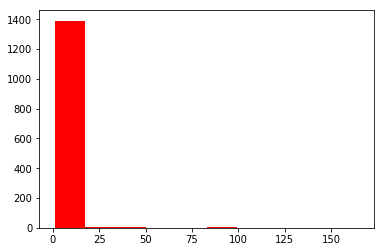

In [54]:
plt.hist(x=df_clean.rating_numerator ,color='red')
plt.show()

Looks better but we can improve it

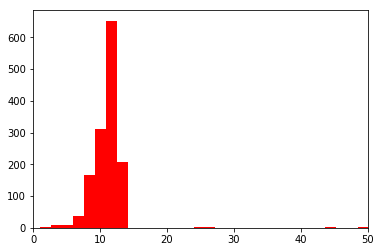

In [56]:
plt.hist(x=df_clean.rating_numerator,bins=100 ,color='red')
plt.xlim(0,50)
plt.show()

This is a useful histogram

In [75]:
df_clean.rating_numerator.mean()

11.452669039145908

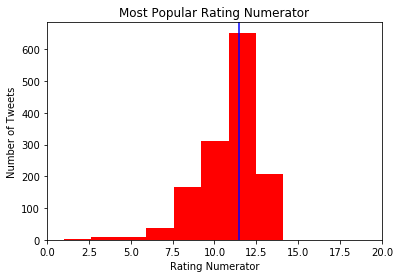

In [66]:
a= df_clean.rating_numerator.mean()
plt.hist(x=df_clean.rating_numerator,bins=100 ,color='red')
plt.xlim(0,20)
plt.axvline(a, color='blue')
plt.title('Most Popular Rating Numerator')
plt.xlabel('Rating Numerator')
plt.ylabel('Number of Tweets')
plt.show()

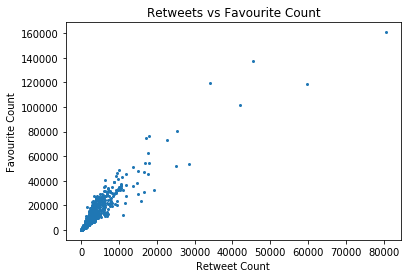

In [77]:
plt.plot(df_clean.retweet_count, df_clean.favourite_count, marker='o', linestyle='', ms=2)
plt.title('Retweets vs Favourite Count')
plt.xlabel('Retweet Count')
plt.ylabel('Favourite Count');

### Observations


- the mean rating for the rating_numerator is 11.5 (awfully low if you ask me)
- the dristribution of rating_numerator vs number of tweets is left skewed
- we can see that the retweet_count vs favourite_count has an obvious correlation which we could have assumed